In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Case_Study_data_for_test.csv")

In [5]:
# checking data format using random sampling 
data.sample(10)

,ID,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
9369,2453,52,Saloon,"£10,528.00","£5,500.00",urban,0.20,approved,Yes,NaN,NaN,NaN,NaN,NaN
5627,6563,31,SUV,"£14,137.00","£2,784.00",urban,NaN,declined,NaN,NaN,NaN,NaN,NaN,NaN
0,9997,61,Convertible,"£24,108.00",£881.00,rural,0.15,approved,No,NaN,NaN,NaN,NaN,NaN
4097,201,41,Saloon,"£16,104.00","£1,710.00",urban,0.15,approved,No,NaN,NaN,NaN,NaN,NaN
1852,5114,60,Convertible,"£9,962.00","£1,305.00",rural,0.10,approved,No,NaN,NaN,NaN,NaN,NaN
1715,5469,60,SUV,"£5,999.00",£746.00,urban,0.20,approved,Yes,NaN,NaN,NaN,NaN,NaN
1187,6849,21,Saloon,"£9,169.00",£571.00,rural,NaN,declined,NaN,NaN,NaN,NaN,NaN,NaN
2424,3574,25,Convertible,"£17,666.00","£1,652.00",urban,NaN,declined,NaN,NaN,NaN,NaN,NaN,NaN
5797,3616,59,Convertible,"£10,187.00","£2,888.00",urban,0.05,approved,No,NaN,NaN,NaN,NaN,NaN
1251,6678,35,Saloon,"£4,982.00",£729.00,urban,0.15,approved,Yes,NaN,NaN,NaN,NaN,NaN


In [6]:
# Colnames
data.columns

Index(['ID', 'age', 'car_type', ' Loanamount ', ' Deposit ', 'area', 'APR',
       'application_outcome', 'Funded ', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [10]:
# removing unwanted trailing space in columsn 
data.columns = [col.strip() for col in data.columns]
print(data.columns)

Index(['age', 'car_type', 'Loanamount', 'Deposit', 'area', 'APR',
       'application_outcome', 'Funded'],
      dtype='object')


In [9]:
# dropping unwanted columns
col_to_drop = ["ID"]
col_to_drop.extend( [col for col in data.columns if "Unnamed" in col] )
data.drop(col_to_drop,axis=1,inplace=True)

KeyError: "['ID'] not found in axis"

In [11]:
# Shape of the dataframe
data.shape

(10000, 8)

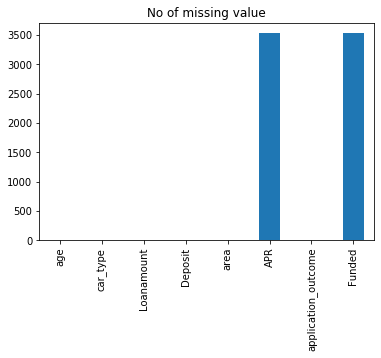

In [12]:
# Count of missing values
data.isna().sum().plot.bar(title="No of missing value")

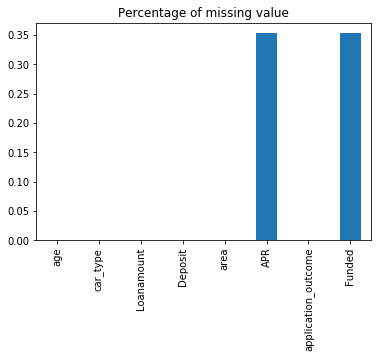

In [13]:
# Percentage of missing values
(data.isna().sum() / data.shape[0]).plot.bar(title="Percentage of missing value")

In [11]:
data.dtypes

age                      int64
car_type                object
Loanamount              object
Deposit                 object
area                    object
APR                    float64
application_outcome     object
Funded                  object
dtype: object

In [14]:
# Converting Loan amount and Deposit into float variable (Data preprocessing)
for col in ["Loanamount","Deposit"]:
    data[col] = data[col].str.replace("£","")
    data[col] = data[col].str.replace(",","")
    data[col] = data[col].astype(float)

In [13]:
data.sample(10)

,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded
3728,37,Saloon,13528.0,1541.0,urban,0.15,approved,Yes
4106,35,Convertible,14086.0,1625.0,rural,NaN,declined,NaN
6600,25,Saloon,10529.0,3463.0,urban,NaN,declined,NaN
174,62,SUV,8503.0,1258.0,rural,0.25,approved,No
6336,58,Convertible,17489.0,3270.0,rural,0.05,approved,No
7114,59,Convertible,18719.0,3812.0,urban,0.05,approved,Yes
1282,52,SUV,3177.0,1031.0,urban,0.20,approved,No
5176,48,Convertible,18714.0,2483.0,urban,0.10,approved,Yes
607,49,Convertible,13420.0,681.0,urban,NaN,declined,NaN
5287,56,Convertible,10788.0,2550.0,rural,0.10,approved,No


[Text(0.5, 1.0, 'Age analysis')]

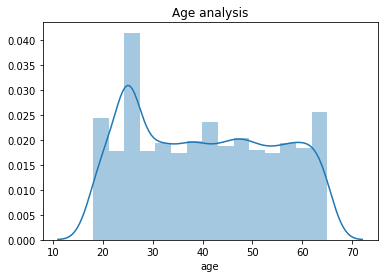

In [15]:
# univariant analysis 
sns.distplot(data["age"],bins=15).set(title = 'Age analysis')

[Text(0.5, 1.0, 'Loan amount analysis')]

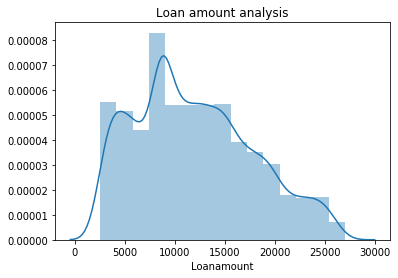

In [15]:
sns.distplot(data["Loanamount"],bins=15).set(title = 'Loan amount analysis')

[Text(0.5, 1.0, 'Deposit analysis')]

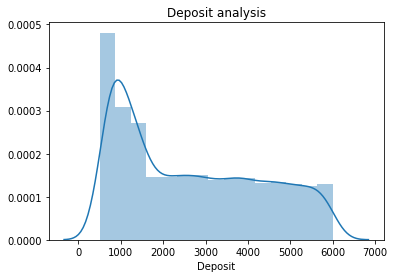

In [16]:
sns.distplot(data["Deposit"],bins=15).set(title = 'Deposit analysis')

[Text(0.5, 1.0, 'car_type analysis')]

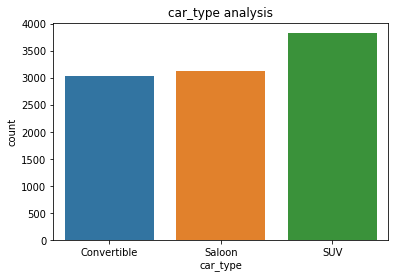

In [16]:
sns.countplot(data["car_type"]).set(title = 'car_type analysis')

[Text(0.5, 1.0, 'area analysis')]

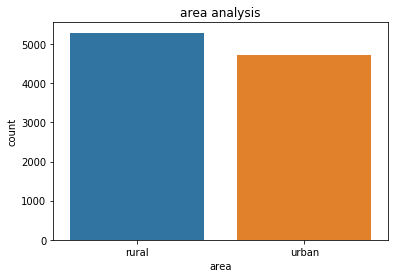

In [18]:
sns.countplot(data["area"]).set(title = 'area analysis')

[Text(0.5, 1.0, 'Application outcome analysis')]

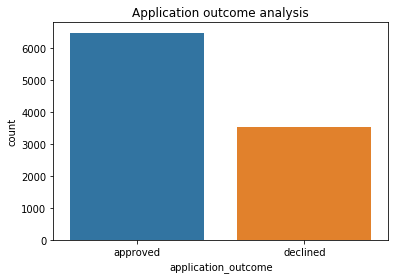

In [19]:
sns.countplot(data["application_outcome"]).set(title = 'Application outcome analysis')

[Text(0.5, 1.0, 'Funded analysis')]

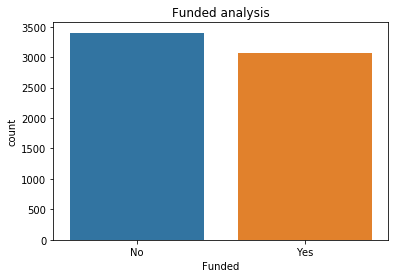

In [20]:
sns.countplot(data["Funded"]).set(title = 'Funded analysis')

In [21]:
# analysis of APR - Annual percentage rate
# there are lot of missing value in APR 
# Finding the assumption that APR is available only for approved loan

#-----
# Hence below analysis there wont be APR for declined application

application_outcome,approved,declined
APR,,
False,6470,0
True,0,3530


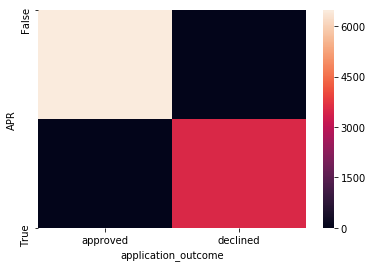

In [19]:
missing_matrix = pd.crosstab(data["APR"].isna(),data["application_outcome"])
sns.heatmap(missing_matrix)

missing_matrix

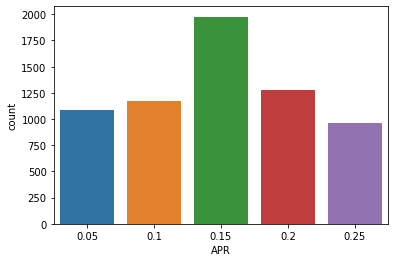

In [20]:
# Since the APR wont be available for declined outcome. We are only considering non missing APR
sns.countplot(data.loc[~data["APR"].isna(),"APR"])

In [24]:
# agewise approved status

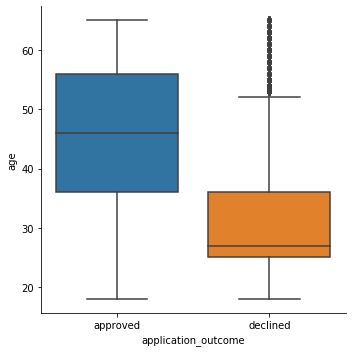

In [21]:
sns.catplot(x="application_outcome", y="age", kind="box", data=data)

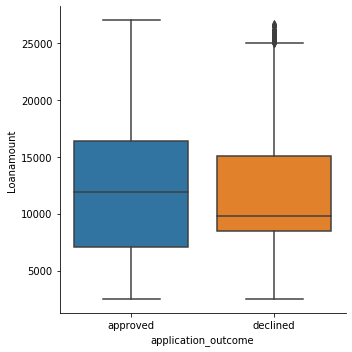

In [26]:
sns.catplot(x="application_outcome", y="Loanamount", kind="box", data=data)

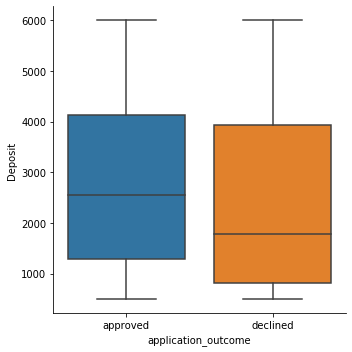

In [27]:
sns.catplot(x="application_outcome", y="Deposit", kind="box", data=data)

area,rural,urban
application_outcome,,
approved,3043,3427
declined,2247,1283


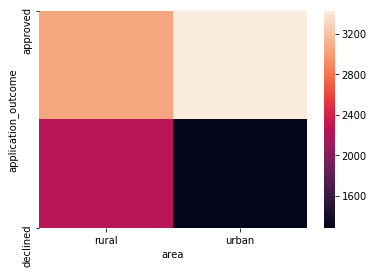

In [28]:
outcome_area = pd.crosstab(data["application_outcome"],data["area"])
sns.heatmap(outcome_area)
outcome_area

car_type,Convertible,SUV,Saloon
application_outcome,,,
approved,2117,2226,2127
declined,916,1604,1010


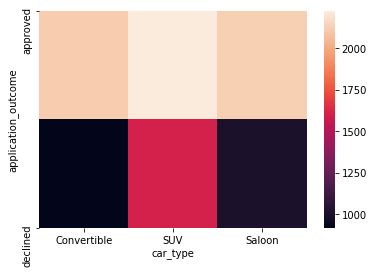

In [29]:
outcome_area = pd.crosstab(data["application_outcome"],data["car_type"])
sns.heatmap(outcome_area)
outcome_area

In [30]:
# now inorder to find complex pattern in datasets 
# Using Cluster to segement out the customers

In [31]:
# addressing missing values 
data.loc[data["APR"].isna(),"APR"] = 0
data.loc[data["application_outcome"] =="declined" ,"Funded"] = "No"

In [32]:
# converting into cat columns
from sklearn.preprocessing import LabelEncoder

encoded_columns = {}
for col in ["car_type","area","application_outcome","Funded"]:
    lb = LabelEncoder()
    data[col]= lb.fit_transform(data[col])
    encoded_columns[col] = lb # might be used to do inverse transform

In [33]:
# checking the data using sampling
data.sample(5)

,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded
9461,37,1,13095.0,5577.0,1,0.25,0,0
446,58,2,2624.0,685.0,0,0.20,0,1
201,39,0,12633.0,1322.0,0,0.10,0,0
9683,31,0,16285.0,5756.0,1,0.20,0,0
6408,37,0,10321.0,3325.0,0,0.05,0,0


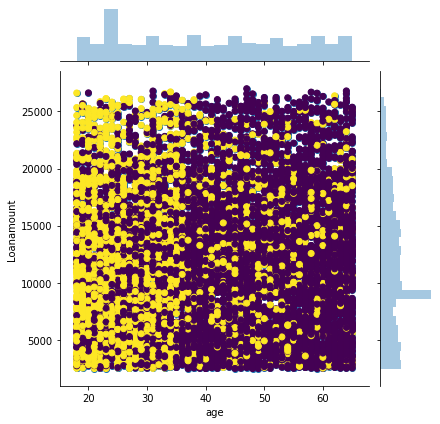

In [34]:
#bivariant 
g = sns.jointplot(data["age"],data["Loanamount"])
g.ax_joint.scatter(data["age"],data["Loanamount"], c=data.application_outcome.astype('category'))

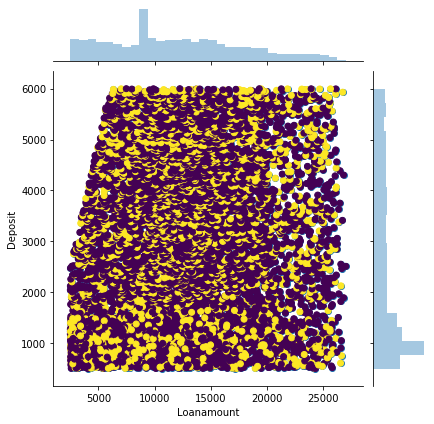

In [35]:
#bivariant 
g = sns.jointplot(data["Loanamount"],data["Deposit"])
g.ax_joint.scatter(data["Loanamount"],data["Deposit"], c=data.application_outcome.astype('category'))

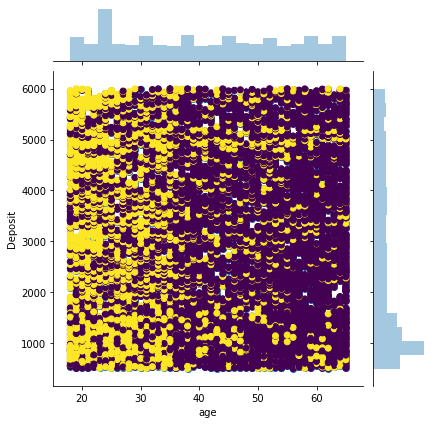

In [36]:
#bivariant 
g = sns.jointplot(data["age"],data["Deposit"])
g.ax_joint.scatter(data["age"],data["Deposit"], c=data.application_outcome.astype('category'))

In [37]:
data.columns

Index(['age', 'car_type', 'Loanamount', 'Deposit', 'area', 'APR',
       'application_outcome', 'Funded'],
      dtype='object')

In [38]:
# applying PCA to reduce and do visualisation
X = data[['age', 'car_type', 'Loanamount', 'Deposit', 'area']]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

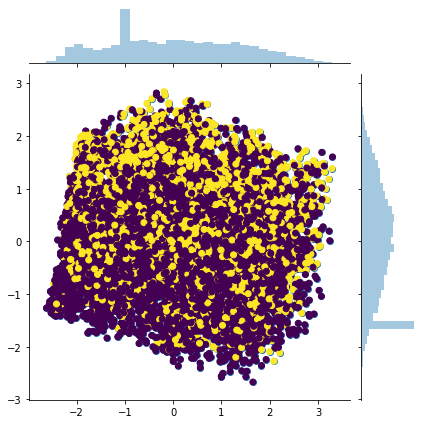

In [40]:
g = sns.jointplot(pca_X[:,0],pca_X[:,1])
g.ax_joint.scatter(pca_X[:,0],pca_X[:,1], c=data.Funded.astype('category'))

In [41]:
# preparing customer segements using Loan amount, age and deposite

In [42]:
from sklearn.cluster import KMeans,AgglomerativeClustering

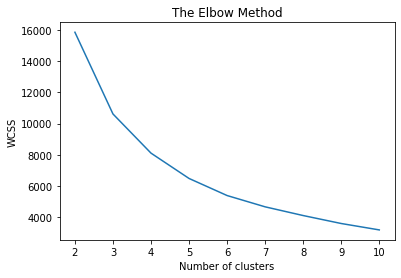

In [43]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=25)
    kmeans.fit(pca_X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
cluster = KMeans(n_clusters=5,random_state=25)
y_kmeans = cluster.fit_predict(pca_X)

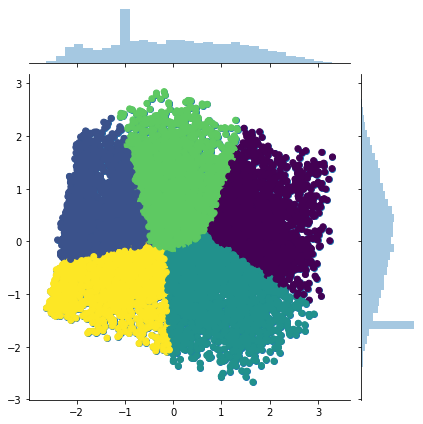

In [45]:
g = sns.jointplot(pca_X[:,0],pca_X[:,1])
g.ax_joint.scatter(pca_X[:,0],pca_X[:,1], c=y_kmeans)

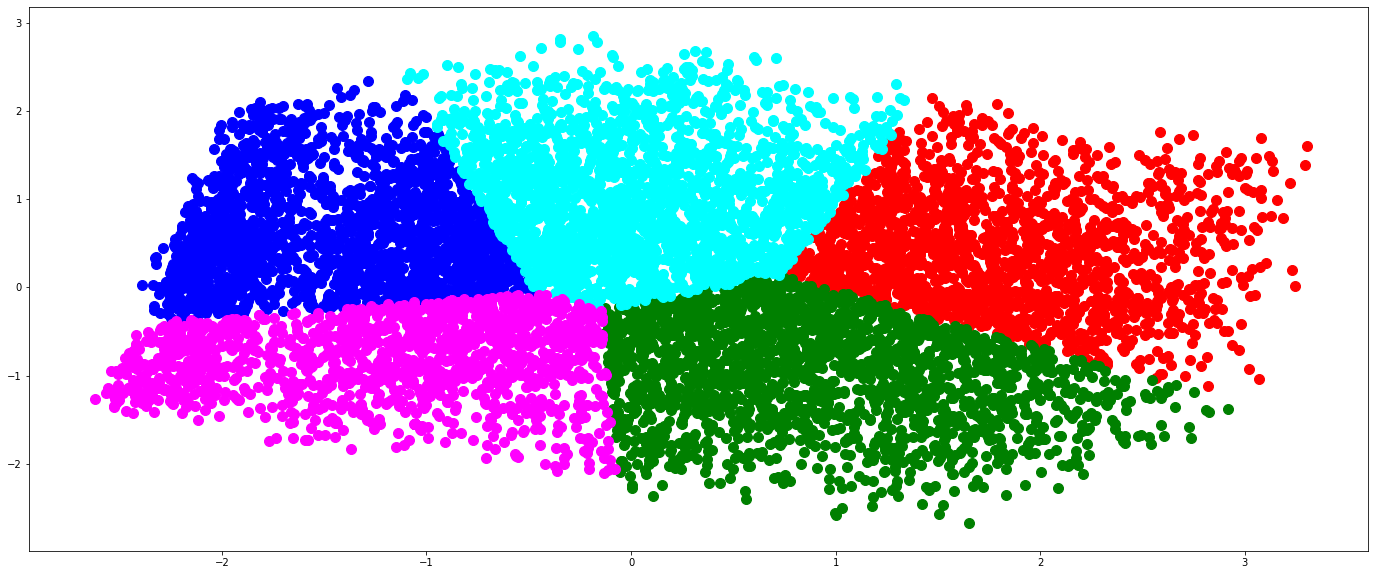

In [46]:
plt.figure(figsize=(24,10))
plt.scatter(pca_X[y_kmeans == 0, 0], pca_X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_X[y_kmeans == 1, 0], pca_X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_X[y_kmeans == 2, 0], pca_X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_X[y_kmeans == 3, 0], pca_X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(pca_X[y_kmeans == 4, 0], pca_X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.show()

In [47]:
data['Customer_segements'] = y_kmeans

In [48]:
for col in ["car_type","area","application_outcome","Funded"]:
    lb = encoded_columns[col]
    data[col]= lb.inverse_transform(data[col])

In [49]:
data.sample(5)

,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded,Customer_segements
6171,56,Saloon,11480.0,3147.0,rural,0.20,approved,Yes,1
4476,19,SUV,10756.0,2004.0,rural,0.05,approved,No,4
2092,61,Saloon,2697.0,549.0,urban,0.15,approved,Yes,1
7441,61,Convertible,12706.0,4037.0,urban,0.10,approved,Yes,0
5291,24,SUV,9284.0,2552.0,urban,0.05,approved,No,3


In [50]:
approved_customer = pd.crosstab(data["Customer_segements"],[data["application_outcome"],data["Funded"]])
approved_customer
# in this analysis we found that customer segement 0 has highest approval 

application_outcome approved      declined
Funded                    No  Yes       No
Customer_segements                        
0                        640  709      402
1                        750  666      529
2                        699  542      834
3                        838  901      422
4                        474  251     1343

In [51]:
# approved and not funded customer 
funded_customer = data[data["application_outcome"] == "approved"]
approved_customer = pd.crosstab(funded_customer["Customer_segements"],funded_customer["Funded"])
approved_customer

Funded,No,Yes
Customer_segements,,
0,640,709
1,750,666
2,699,542
3,838,901
4,474,251


data["Loanamount"] = pd.cut(data["Loanamount"],bins=5)
data["Loanamount_coded"] = data["Loanamount"].cat.codes
data[["Loanamount","Loanamount_coded"]].drop_duplicates()

data["Deposit"] = pd.cut(data["Deposit"],bins=5)
data["Deposit_coded"] = data["Deposit"].cat.codes
data[["Deposit","Deposit_coded"]].drop_duplicates()

In [96]:
# selecting a most approved customer and not funded customer (0,4 - segement are selected) 
model_data = data[["car_type",'Customer_segements', 'age',
       'Loanamount', 'Deposit',"area","APR","application_outcome","Funded"]]
model_data = model_data.loc[ (model_data["Customer_segements"].isin([2])) & (model_data["application_outcome"] == "approved")]
model_data.sample(10)

,car_type,Customer_segements,age,Loanamount,Deposit,area,APR,application_outcome,Funded
5706,Convertible,2,38,11038.0,2830.0,rural,0.05,approved,Yes
461,SUV,2,56,13186.0,1326.0,rural,0.20,approved,No
4624,SUV,2,50,19719.0,2106.0,rural,0.10,approved,Yes
7340,Convertible,2,30,20014.0,3971.0,rural,0.20,approved,Yes
6023,Convertible,2,59,14469.0,3047.0,rural,0.25,approved,Yes
9568,Convertible,2,29,17976.0,5674.0,rural,0.10,approved,Yes
1846,Convertible,2,40,14044.0,626.0,rural,0.10,approved,No
7125,SUV,2,21,14804.0,3820.0,rural,0.25,approved,Yes
5330,Convertible,2,23,25360.0,2576.0,rural,0.10,approved,Yes
3857,Convertible,2,38,19316.0,806.0,urban,0.05,approved,No


In [97]:
pd.crosstab(model_data.APR,model_data.Funded)

Funded,No,Yes
APR,,
0.05,189,146
0.10,206,135
0.15,106,97
0.20,126,111
0.25,72,53


In [1260]:
encoded_columns = {}
for col in ["car_type","area","application_outcome","Funded"]:
 a   lb = LabelEncoder()
    model_data[col]= lb.fit_transform(model_data[col])
    encoded_columns[col] = lb # might be used to do inverse transform

In [1261]:
# surrogate model methods to understand cluster
from sklearn.tree import DecisionTreeClassifier, plot_tree

X= model_data[["Loanamount","Deposit","age","car_type"]]

y = model_data["Funded"]

model = DecisionTreeClassifier(max_depth=4)
model.fit(X,y)
print(model.feature_importances_)

[0.06684898 0.86241391 0.07073711 0.        ]


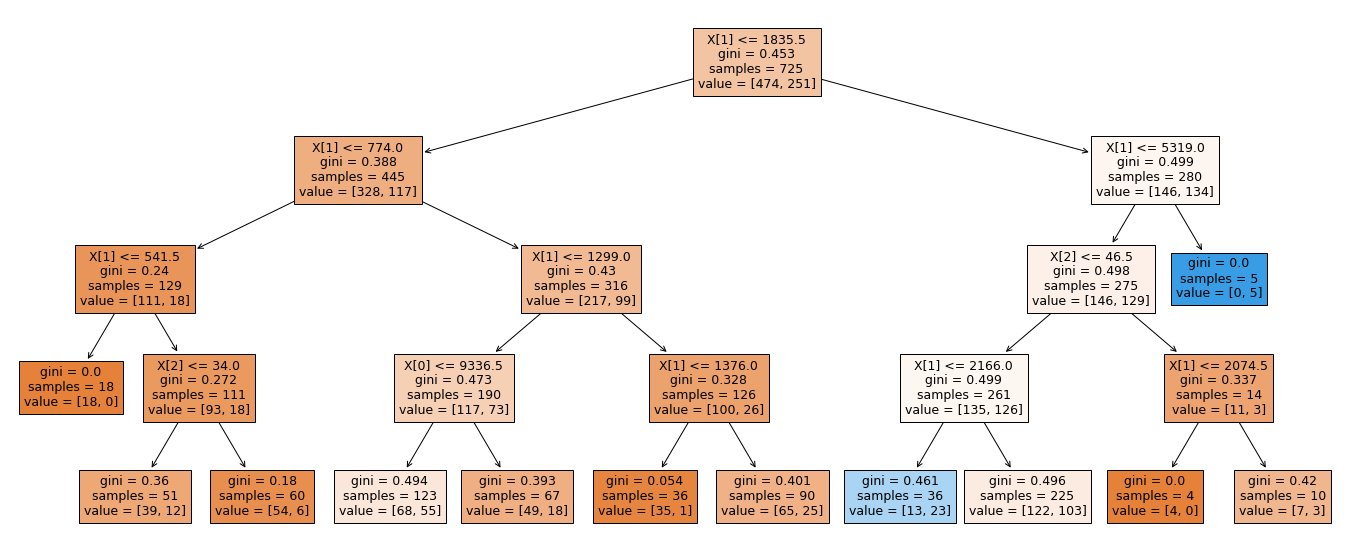

In [1262]:
plt.figure(figsize=(24,10))
plot_tree(model, filled=True)
plt.show()

In [1263]:
from sklearn.tree.export import export_text
tree_rules = export_text(model, feature_names=list(X))
print(tree_rules)

|--- Deposit <= 1835.50
|   |--- Deposit <= 774.00
|   |   |--- Deposit <= 541.50
|   |   |   |--- class: 0
|   |   |--- Deposit >  541.50
|   |   |   |--- age <= 34.00
|   |   |   |   |--- class: 0
|   |   |   |--- age >  34.00
|   |   |   |   |--- class: 0
|   |--- Deposit >  774.00
|   |   |--- Deposit <= 1299.00
|   |   |   |--- Loanamount <= 9336.50
|   |   |   |   |--- class: 0
|   |   |   |--- Loanamount >  9336.50
|   |   |   |   |--- class: 0
|   |   |--- Deposit >  1299.00
|   |   |   |--- Deposit <= 1376.00
|   |   |   |   |--- class: 0
|   |   |   |--- Deposit >  1376.00
|   |   |   |   |--- class: 0
|--- Deposit >  1835.50
|   |--- Deposit <= 5319.00
|   |   |--- age <= 46.50
|   |   |   |--- Deposit <= 2166.00
|   |   |   |   |--- class: 1
|   |   |   |--- Deposit >  2166.00
|   |   |   |   |--- class: 0
|   |   |--- age >  46.50
|   |   |   |--- Deposit <= 2074.50
|   |   |   |   |--- class: 0
|   |   |   |--- Deposit >  2074.50
|   |   |   |   |--- class: 0
|   |--- Dep